<center><img src='../img/Untitled design.png'></center>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

pd.set_option('display.max_columns',None)

In [2]:
dataframe = pd.read_csv('preprocessed.csv')
dataframe.head(10)

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds,Driver_code,Country_code,Team_code
0,1,44,Lewis Hamilton,Mercedes,58.0,1:31:54.067,25.0,Flag of AustraliaAustralia,2015-03-15,5514.067,26,0,23
1,2,6,Nico Rosberg,Mercedes,58.0,+1.360s,18.0,Flag of AustraliaAustralia,2015-03-15,1.360,34,0,23
2,3,5,Sebastian Vettel,Ferrari,58.0,+34.523s,15.0,Flag of AustraliaAustralia,2015-03-15,34.523,47,0,10
3,4,19,Felipe Massa,Williams Mercedes,58.0,+38.196s,12.0,Flag of AustraliaAustralia,2015-03-15,38.196,10,0,40
4,5,12,Felipe Nasr,Sauber Ferrari,58.0,+95.149s,10.0,Flag of AustraliaAustralia,2015-03-15,95.149,11,0,35
5,6,3,Daniel Ricciardo,Red Bull Racing Renault,57.0,+1 lap,8.0,Flag of AustraliaAustralia,2015-03-15,90.000,6,0,31
6,7,27,Nico Hulkenberg,Force India Mercedes,57.0,+1 lap,6.0,Flag of AustraliaAustralia,2015-03-15,90.000,33,0,11
7,8,9,Marcus Ericsson,Sauber Ferrari,57.0,+1 lap,4.0,Flag of AustraliaAustralia,2015-03-15,90.000,29,0,35
8,9,55,Carlos Sainz,STR Renault,57.0,+1 lap,2.0,Flag of AustraliaAustralia,2015-03-15,90.000,4,0,34
9,10,11,Sergio Perez,Force India Mercedes,57.0,+1 lap,1.0,Flag of AustraliaAustralia,2015-03-15,90.000,49,0,11


In [3]:
dataframe.shape

(3931, 13)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3931 entries, 0 to 3930
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pos.            3931 non-null   object 
 1   No.             3931 non-null   int64  
 2   Driver          3931 non-null   object 
 3   Team            3931 non-null   object 
 4   Laps            3931 non-null   float64
 5   Time / Retired  3931 non-null   object 
 6   Pts.            3931 non-null   float64
 7   Country         3931 non-null   object 
 8   Race Dates      3931 non-null   object 
 9   Time_seconds    3931 non-null   float64
 10  Driver_code     3931 non-null   int64  
 11  Country_code    3931 non-null   int64  
 12  Team_code       3931 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 399.4+ KB


In [5]:
dataframe.drop(['Driver_code','Country_code','Team_code'],axis=1,inplace=True)
dataframe.head()

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds
0,1,44,Lewis Hamilton,Mercedes,58.0,1:31:54.067,25.0,Flag of AustraliaAustralia,2015-03-15,5514.067
1,2,6,Nico Rosberg,Mercedes,58.0,+1.360s,18.0,Flag of AustraliaAustralia,2015-03-15,1.360
2,3,5,Sebastian Vettel,Ferrari,58.0,+34.523s,15.0,Flag of AustraliaAustralia,2015-03-15,34.523
3,4,19,Felipe Massa,Williams Mercedes,58.0,+38.196s,12.0,Flag of AustraliaAustralia,2015-03-15,38.196
4,5,12,Felipe Nasr,Sauber Ferrari,58.0,+95.149s,10.0,Flag of AustraliaAustralia,2015-03-15,95.149


In [6]:
from sklearn.preprocessing import LabelEncoder

driver_encoder = LabelEncoder()
country_encoder = LabelEncoder()
team_encoder = LabelEncoder()

dataframe['Driver_code'] = driver_encoder.fit_transform(dataframe['Driver'])
dataframe['Country_code'] = country_encoder.fit_transform(dataframe['Country'])
dataframe['Team_code'] = team_encoder.fit_transform(dataframe['Team'])


In [7]:
dataframe.columns

Index(['Pos.', 'No.', 'Driver', 'Team', 'Laps', 'Time / Retired', 'Pts.',
       'Country', 'Race Dates', 'Time_seconds', 'Driver_code', 'Country_code',
       'Team_code'],
      dtype='object')

In [11]:
dataframe = dataframe[dataframe['Pos.'] != 'DQ']
dataframe = dataframe[dataframe['Pos.'] != 'EX']
dataframe['Pos.'] = dataframe['Pos.'].astype(int)
dataframe['Pos.'].dtypes

dtype('int32')

In [12]:
# Suppose your position column is 'Pos.'
dataframe['Pos_class'] = dataframe['Pos.'].apply(lambda x: x if x <= 10 else 11)

In [13]:
df = dataframe[['Pos.', 'No.', 'Laps', 'Pts.','Race Dates', 'Time_seconds', 'Driver_code', 'Country_code','Team_code','Pos_class']]
df.head(10)

,Pos.,No.,Laps,Pts.,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
0,1,44,58.0,25.0,2015-03-15,5514.067,26,0,23,1
1,2,6,58.0,18.0,2015-03-15,1.360,34,0,23,2
2,3,5,58.0,15.0,2015-03-15,34.523,47,0,10,3
3,4,19,58.0,12.0,2015-03-15,38.196,10,0,40,4
4,5,12,58.0,10.0,2015-03-15,95.149,11,0,35,5
5,6,3,57.0,8.0,2015-03-15,90.000,6,0,31,6
6,7,27,57.0,6.0,2015-03-15,90.000,33,0,11,7
7,8,9,57.0,4.0,2015-03-15,90.000,29,0,35,8
8,9,55,57.0,2.0,2015-03-15,90.000,4,0,34,9
9,10,11,57.0,1.0,2015-03-15,90.000,49,0,11,10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3921 entries, 0 to 3930
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pos.          3921 non-null   int32  
 1   No.           3921 non-null   int64  
 2   Laps          3921 non-null   float64
 3   Pts.          3921 non-null   float64
 4   Race Dates    3921 non-null   object 
 5   Time_seconds  3921 non-null   float64
 6   Driver_code   3921 non-null   int32  
 7   Country_code  3921 non-null   int32  
 8   Team_code     3921 non-null   int32  
 9   Pos_class     3921 non-null   int64  
dtypes: float64(3), int32(4), int64(2), object(1)
memory usage: 275.7+ KB


In [15]:
dataframe.describe(include='all')

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
count,3921.000000,3921.000000,3921,3921,3921.000000,3921,3921.000000,3921,3921,3921.000000,3921.000000,3921.00000,3921.000000,3921.000000
unique,NaN,NaN,55,41,NaN,2518,NaN,36,233,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Lewis Hamilton,Mercedes,NaN,+1 lap,NaN,Flag of SpainSpain,2016-10-09,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,218,430,NaN,1161,NaN,196,22,NaN,NaN,NaN,NaN,NaN
mean,9.040806,27.885233,NaN,NaN,59.600102,NaN,6.012879,NaN,NaN,404.401172,26.053303,17.61770,20.138995,7.731701
std,5.055899,24.726454,NaN,NaN,9.913696,NaN,7.476495,NaN,NaN,1367.170404,16.259141,10.52446,11.699482,3.492768
min,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,0.179000,0.000000,0.00000,0.000000,1.000000
25%,5.000000,9.000000,NaN,NaN,53.000000,NaN,0.000000,NaN,NaN,33.188000,11.000000,8.00000,10.000000,5.000000
50%,9.000000,20.000000,NaN,NaN,57.000000,NaN,2.000000,NaN,NaN,77.259000,25.000000,17.00000,21.000000,9.000000
75%,13.000000,44.000000,NaN,NaN,69.000000,NaN,10.000000,NaN,NaN,90.000000,41.000000,27.00000,29.000000,11.000000


In [17]:
correlation = df.drop('Race Dates',axis=1).corr()
correlation

,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
Pos.,1.000000,0.030911,-0.037826,-0.880825,-0.371427,0.028154,0.026446,-0.020322,0.933178
No.,0.030911,1.000000,0.015094,0.008127,-0.008179,0.008687,0.000670,0.025137,-0.003405
Laps,-0.037826,0.015094,1.000000,0.039972,0.024019,-0.002047,-0.032639,0.005037,-0.031920
Pts.,-0.880825,0.008127,0.039972,1.000000,0.615210,0.031204,-0.012713,0.048186,-0.973515
Time_seconds,-0.371427,-0.008179,0.024019,0.615210,1.000000,0.050214,0.000387,0.065764,-0.456691
Driver_code,0.028154,0.008687,-0.002047,0.031204,0.050214,1.000000,-0.018343,-0.135633,-0.010129
Country_code,0.026446,0.000670,-0.032639,-0.012713,0.000387,-0.018343,1.000000,-0.009059,0.016002
Team_code,-0.020322,0.025137,0.005037,0.048186,0.065764,-0.135633,-0.009059,1.000000,-0.036481
Pos_class,0.933178,-0.003405,-0.031920,-0.973515,-0.456691,-0.010129,0.016002,-0.036481,1.000000


<Axes: >

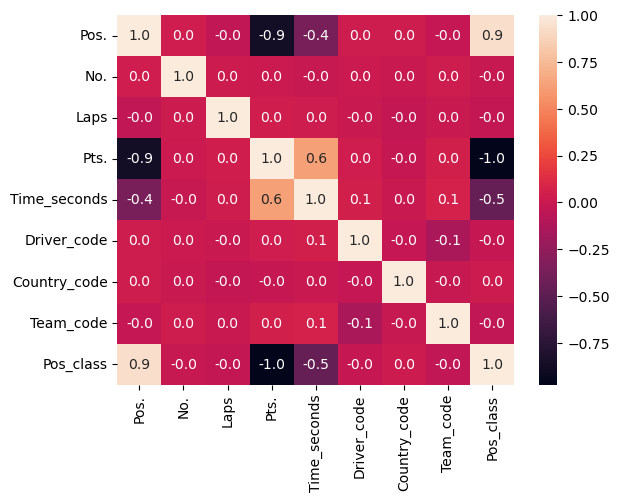

In [18]:
plt.figure()
sns.heatmap(correlation,fmt='.1f',annot=True)

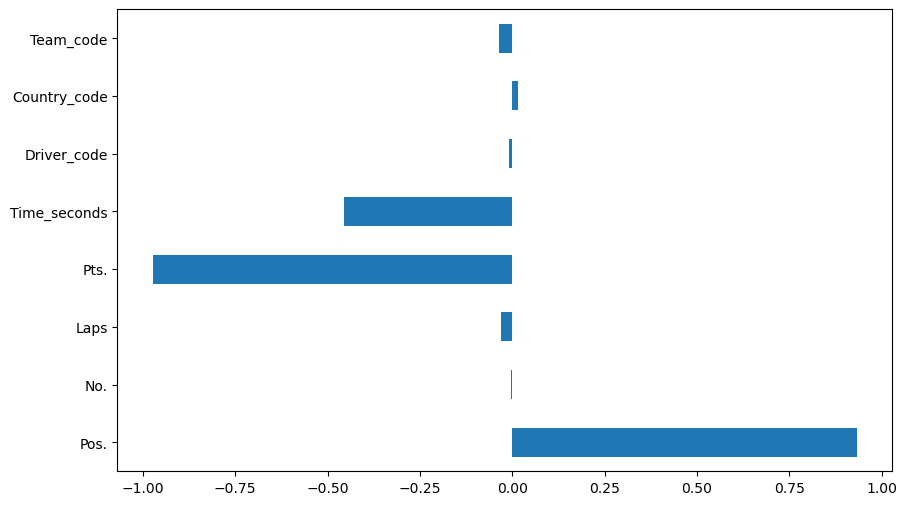

In [20]:
correlation_values = df.drop('Race Dates',axis=1).corr()['Pos_class'].drop('Pos_class')
correlation_values.plot(kind='barh', figsize=(10, 6))
plt.show()

In [21]:
df.shape

(3921, 10)

In [23]:
j = 0
for i in correlation.columns: 
    if ((correlation[i] <= 0).sum()) >= 4:
        j = j+1
        print(j,'.',i,(correlation[i] <= 0).sum())

1 . Pos. 4
2 . Laps 4
3 . Driver_code 4
4 . Country_code 4
5 . Team_code 4
6 . Pos_class 6


In [24]:
df.columns

Index(['Pos.', 'No.', 'Laps', 'Pts.', 'Race Dates', 'Time_seconds',
       'Driver_code', 'Country_code', 'Team_code', 'Pos_class'],
      dtype='object')

# Application 

In [25]:
df.head()

,Pos.,No.,Laps,Pts.,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
0,1,44,58.0,25.0,2015-03-15,5514.067,26,0,23,1
1,2,6,58.0,18.0,2015-03-15,1.360,34,0,23,2
2,3,5,58.0,15.0,2015-03-15,34.523,47,0,10,3
3,4,19,58.0,12.0,2015-03-15,38.196,10,0,40,4
4,5,12,58.0,10.0,2015-03-15,95.149,11,0,35,5


In [26]:
df['Race Dates'] = pd.to_datetime(df['Race Dates'])

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_5004\1034952387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race Dates'] = pd.to_datetime(df['Race Dates'])


In [27]:
df['Race Dates'].dtype

dtype('<M8[ns]')

# Results dataframe

In [28]:
dataframe['Race Dates'] = pd.to_datetime(dataframe['Race Dates'])
result = dataframe[dataframe['Race Dates'] > pd.to_datetime('2024-12-31')]

In [29]:
result['Country'].unique()

array(['Flag of AustraliaAustralia',
       'Flag of People’s Republic of ChinaChina', 'Flag of JapanJapan',
       'Flag of BahrainBahrain', 'Flag of Saudi ArabiaSaudi Arabia',
       'Flag of United States of AmericaMiami',
       'Flag of ItalyEmilia-Romagna', 'Flag of MonacoMonaco',
       'Flag of SpainSpain', 'Flag of CanadaCanada',
       'Flag of AustriaAustria', 'Flag of Great BritainGreat Britain',
       'Flag of BelgiumBelgium', 'Flag of HungaryHungary',
       'Flag of NetherlandsNetherlands', 'Flag of ItalyItaly',
       'Flag of AzerbaijanAzerbaijan', 'Flag of SingaporeSingapore',
       'Flag of United States of AmericaUnited States',
       'Flag of MexicoMexico', 'Flag of BrazilBrazil',
       'Flag of United States of AmericaLas Vegas', 'Flag of QatarQatar',
       'Flag of United Arab EmiratesAbu Dhabi'], dtype=object)

In [30]:
c = result[['Country','Country_code']]
c[c['Country'] == 'Flag of United States of AmericaLas Vegas'].head(1)

,Country,Country_code
3880,Flag of United States of AmericaLas Vegas,33


In [31]:
r = result[result['Country_code'] == 33]
r.head()

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
3880,1,1,Max Verstappen,Red Bull Racing,50.0,1:21:08.429,25.0,Flag of United States of AmericaLas Vegas,2025-11-22,4868.429,30,33,27,1
3881,2,63,George Russell,Mercedes,50.0,+23.546s,18.0,Flag of United States of AmericaLas Vegas,2025-11-22,23.546,15,33,23,2
3882,3,12,Kimi Antonelli,Mercedes,50.0,+30.488s,15.0,Flag of United States of AmericaLas Vegas,2025-11-22,30.488,22,33,23,3
3883,4,16,Charles Leclerc,Ferrari,50.0,+30.678s,12.0,Flag of United States of AmericaLas Vegas,2025-11-22,30.678,5,33,10,4
3884,5,55,Carlos Sainz,Williams,50.0,+34.924s,10.0,Flag of United States of AmericaLas Vegas,2025-11-22,34.924,4,33,39,5


In [32]:
r.drop(['Time_seconds', 'Driver_code', 'Country_code','Team_code','Pos_class'],axis=1,inplace=True)
r.head()

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_5004\2083436844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r.drop(['Time_seconds', 'Driver_code', 'Country_code','Team_code','Pos_class'],axis=1,inplace=True)


,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates
3880,1,1,Max Verstappen,Red Bull Racing,50.0,1:21:08.429,25.0,Flag of United States of AmericaLas Vegas,2025-11-22
3881,2,63,George Russell,Mercedes,50.0,+23.546s,18.0,Flag of United States of AmericaLas Vegas,2025-11-22
3882,3,12,Kimi Antonelli,Mercedes,50.0,+30.488s,15.0,Flag of United States of AmericaLas Vegas,2025-11-22
3883,4,16,Charles Leclerc,Ferrari,50.0,+30.678s,12.0,Flag of United States of AmericaLas Vegas,2025-11-22
3884,5,55,Carlos Sainz,Williams,50.0,+34.924s,10.0,Flag of United States of AmericaLas Vegas,2025-11-22


# Train dataframe

In [33]:
train = df[df['Race Dates'] <= pd.to_datetime('2024-12-31')]
train.drop('Race Dates',axis=1,inplace=True)
print(train.shape)
train.head()

(3502, 9)


C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_5004\3000673310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Race Dates',axis=1,inplace=True)


,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
0,1,44,58.0,25.0,5514.067,26,0,23,1
1,2,6,58.0,18.0,1.360,34,0,23,2
2,3,5,58.0,15.0,34.523,47,0,10,3
3,4,19,58.0,12.0,38.196,10,0,40,4
4,5,12,58.0,10.0,95.149,11,0,35,5


# Test dataframe

In [34]:
test = df[df['Race Dates'] > pd.to_datetime('2024-12-31')]
print(test.shape)
test.head()

(419, 10)


,Pos.,No.,Laps,Pts.,Race Dates,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
3512,1,4,57.0,25.0,2025-03-16,6126.304,25,0,19,1
3513,2,1,57.0,18.0,2025-03-16,0.895,30,0,27,2
3514,3,63,57.0,15.0,2025-03-16,8.481,15,0,23,3
3515,4,12,57.0,12.0,2025-03-16,10.135,22,0,23,4
3516,5,23,57.0,10.0,2025-03-16,12.773,0,0,39,5


In [35]:
race = test[test['Country_code'] == 33]
race.drop('Race Dates',axis=1,inplace=True)
race

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_5004\558840671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race.drop('Race Dates',axis=1,inplace=True)


,Pos.,No.,Laps,Pts.,Time_seconds,Driver_code,Country_code,Team_code,Pos_class
3880,1,1,50.0,25.0,4868.429,30,33,27,1
3881,2,63,50.0,18.0,23.546,15,33,23,2
3882,3,12,50.0,15.0,30.488,22,33,23,3
3883,4,16,50.0,12.0,30.678,5,33,10,4
3884,5,55,50.0,10.0,34.924,4,33,39,5
3885,6,6,50.0,8.0,45.257,16,33,25,6
3886,7,27,50.0,6.0,51.134,33,33,14,7
3887,8,44,50.0,4.0,59.369,26,33,10,8
3888,9,31,50.0,2.0,60.635,9,33,12,9
3889,10,87,50.0,1.0,70.549,37,33,12,10


# Data spliting

In [36]:
X_test = race.drop('Pos_class',axis=1)    # create the test data set by yourself see above test data frame
y_test = race['Pos_class']
X_train = train.drop('Pos_class',axis=1)
y_train = train['Pos_class']

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of y_test : ', y_test.shape)

Size of X_train :  (3502, 8)
Size of y_train :  (3502,)
Size of X_test :  (15, 8)
Size of y_test :  (15,)


In [37]:
rfc = RandomForestClassifier(n_estimators=100,random_state=25)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=25)

# Making Predicition

In [38]:
y_pred = rfc.predict(X_test)

In [39]:
y_proba = rfc.predict_proba(X_test)

In [40]:
probablities = pd.DataFrame(y_proba,columns=range(1,12))

In [41]:
r['Predicted Position'] = y_pred

C:\Users\AL Rehman Computer\AppData\Local\Temp\ipykernel_5004\1008806100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Predicted Position'] = y_pred


In [42]:
# Suppose your original result DataFrame is called df_result
# And your probabilities DataFrame is called probabilities

df_merged = pd.concat([r.reset_index(drop=True),
                       probablities.reset_index(drop=True)],
                      axis=1)

# <center><u>Race Results</u></center>

In [43]:
df_merged

,Pos.,No.,Driver,Team,Laps,Time / Retired,Pts.,Country,Race Dates,Predicted Position,1,2,3,4,5,6,7,8,9,10,11
0,1,1,Max Verstappen,Red Bull Racing,50.0,1:21:08.429,25.0,Flag of United States of AmericaLas Vegas,2025-11-22,1,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
1,2,63,George Russell,Mercedes,50.0,+23.546s,18.0,Flag of United States of AmericaLas Vegas,2025-11-22,2,0.02,0.81,0.14,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00
2,3,12,Kimi Antonelli,Mercedes,50.0,+30.488s,15.0,Flag of United States of AmericaLas Vegas,2025-11-22,3,0.00,0.02,0.90,0.01,0.02,0.04,0.01,0.00,0.00,0.00,0.00
3,4,16,Charles Leclerc,Ferrari,50.0,+30.678s,12.0,Flag of United States of AmericaLas Vegas,2025-11-22,4,0.00,0.00,0.01,0.96,0.01,0.02,0.00,0.00,0.00,0.00,0.00
4,5,55,Carlos Sainz,Williams,50.0,+34.924s,10.0,Flag of United States of AmericaLas Vegas,2025-11-22,5,0.00,0.00,0.00,0.08,0.65,0.18,0.05,0.02,0.01,0.01,0.00
5,6,6,Isack Hadjar,Racing Bulls,50.0,+45.257s,8.0,Flag of United States of AmericaLas Vegas,2025-11-22,6,0.00,0.00,0.00,0.01,0.06,0.88,0.01,0.01,0.02,0.01,0.00
6,7,27,Nico Hulkenberg,Kick Sauber,50.0,+51.134s,6.0,Flag of United States of AmericaLas Vegas,2025-11-22,7,0.00,0.00,0.00,0.00,0.01,0.01,0.94,0.04,0.00,0.00,0.00
7,8,44,Lewis Hamilton,Ferrari,50.0,+59.369s,4.0,Flag of United States of AmericaLas Vegas,2025-11-22,8,0.00,0.00,0.00,0.00,0.00,0.03,0.07,0.83,0.06,0.01,0.00
8,9,31,Esteban Ocon,Haas F1 Team,50.0,+60.635s,2.0,Flag of United States of AmericaLas Vegas,2025-11-22,9,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.06,0.87,0.04,0.00
9,10,87,Oliver Bearman,Haas F1 Team,50.0,+70.549s,1.0,Flag of United States of AmericaLas Vegas,2025-11-22,10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.90,0.02


<img src=../img/images.jpg width=100%>